<a href="https://colab.research.google.com/github/rmynzl/calismalarim/blob/main/say%C4%B1salgoruntuvize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli Paketleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [ ]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 35.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [ ]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [ ]:
# Look at the data type of each column and whether null values are present
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Uniqe Değer Kontrolü
“PatientId” her hasta için bir kimlik numarasına sahiptir. Bunun gibi tıbbi bir veri kümesi hakkında bilmek isteyeceğiniz bir şey, belirli hastalar için tekrarlanan verilere mi baktığınız yoksa her görüntünün farklı bir kişiyi mi temsil ettiğidir.

In [ ]:
print(f"Toplam hasta kimlikleri {train_df['PatientId'].count()} olup, bunlardan benzersiz kimliklerin sayısı {train_df['PatientId'].value_counts().shape[0]} ")

Toplam hasta kimlikleri 1000 olup, bunlardan benzersiz kimliklerin sayısı 928 



 Çıktıya göre, veri kümesindeki benzersiz hasta sayısı toplam sayıdan daha azdır, bu nedenle çakışma olduğu düşünlmektedir.

Display Random Images


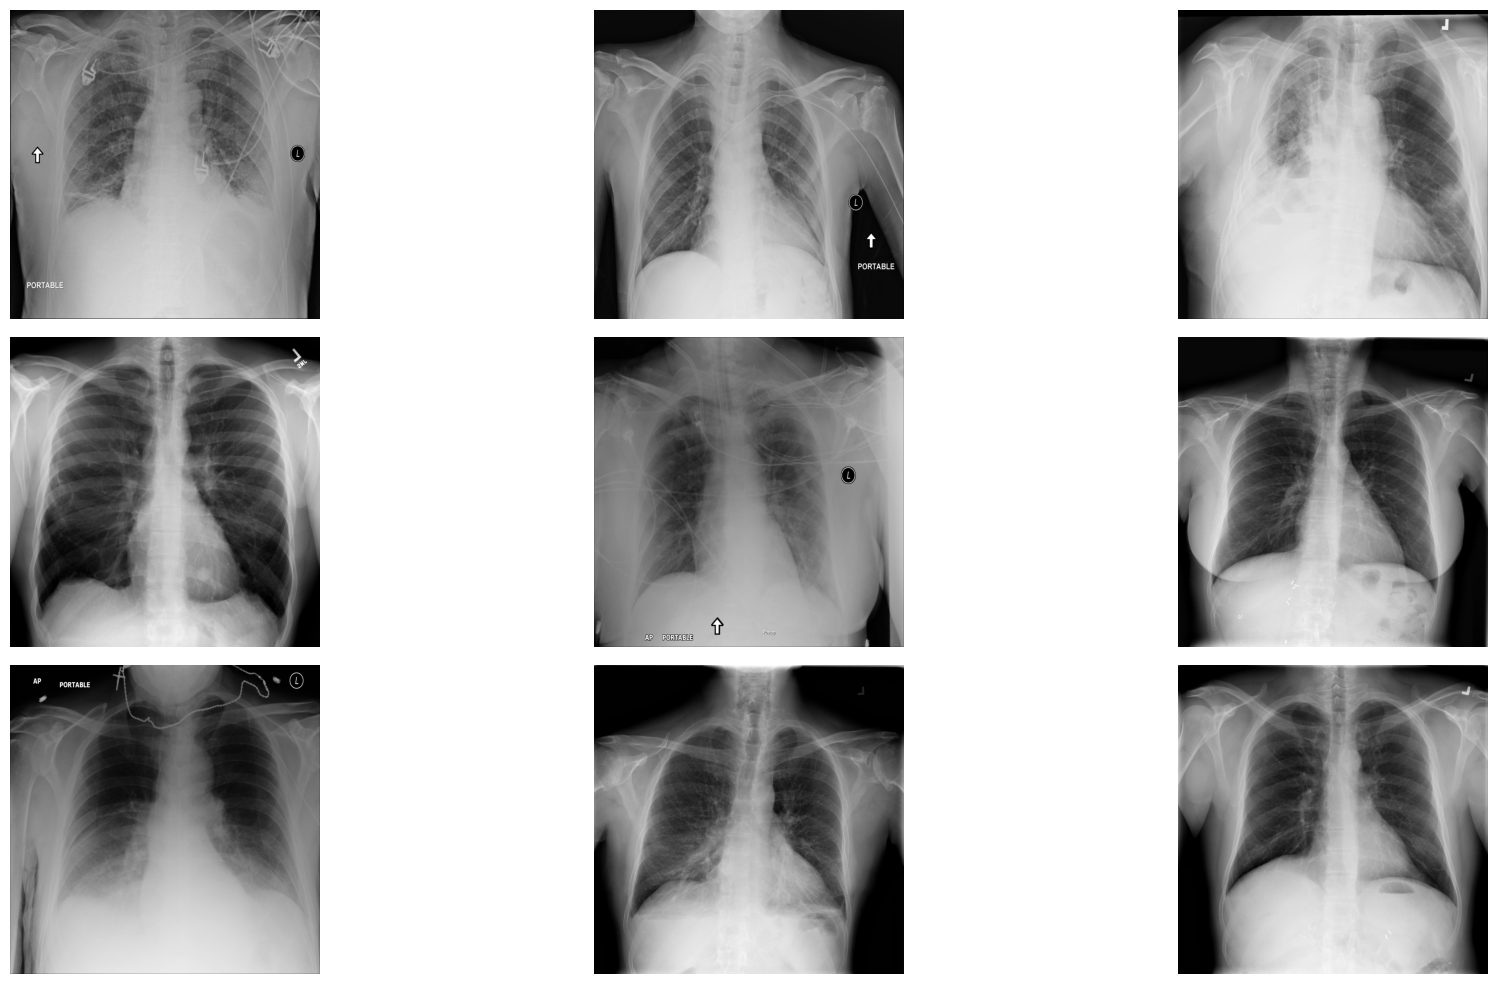

In [ ]:
# Veri çerçevesindeki Image sütunundan değerleri ayıklayalım
images = train_df['Image'].values

# Görüntülerin içerisinden rastgele 9 görüntüyü ayıklayalım
random_images = [np.random.choice(images) for i in range(9)]

# Görüntü konumu
img_dir = 'nih/images_small/'

print('Display Random Images')

# Resimlerin boyutunu ayarlayalım
plt.figure(figsize=(20,10))

# Rastgele seçtiğmiz görüntüleri tablolaştırlım
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

## Graif parametrelerini ayarlayalım
plt.tight_layout()

Görüntünün boyutları 1024 piksel genişlik ve 1024 piksel yükseklik, tek bir renk kanalı
Piksel değerlerinin maksimumu 0.9804 ve minimumu 0.0000
Piksellerin ortalama değeri 0.4796 ve standart sapması 0.2757


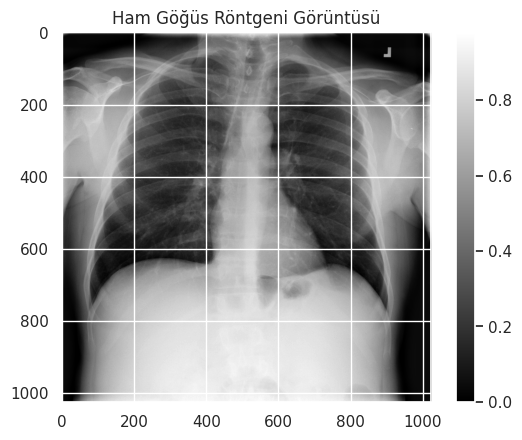

In [ ]:
# Seçilen görüntülerin her biri için maksimum, minimum, ortalama ve standart sapma değerlerini hesaplayalım.

sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Ham Göğüs Röntgeni Görüntüsü')
print(f"Görüntünün boyutları {raw_image.shape[0]} piksel genişlik ve {raw_image.shape[1]} piksel yükseklik, tek bir renk kanalı")
print(f"Piksel değerlerinin maksimumu {raw_image.max():.4f} ve minimumu {raw_image.min():.4f}")
print(f"Piksellerin ortalama değeri {raw_image.mean():.4f} ve standart sapması {raw_image.std():.4f}")


<ipython-input-13-a76e40da572d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, 'Görüntüdeki Piksel Sayısı')

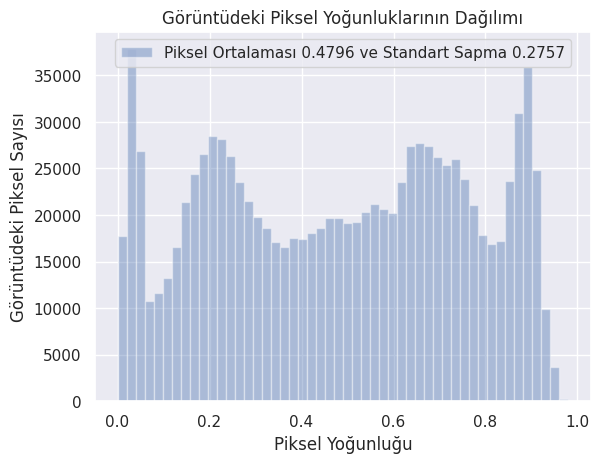

In [ ]:
# .Rastgele Seçilen 9 görüntünün pksel yoğunluk dağılımını göstren histogramı çizelim

sns.distplot(raw_image.ravel(),
             label=f'Piksel Ortalaması {np.mean(raw_image):.4f} ve Standart Sapma {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Görüntüdeki Piksel Yoğunluklarının Dağılımı')
plt.xlabel('Piksel Yoğunluğu')
plt.ylabel('Görüntüdeki Piksel Sayısı')


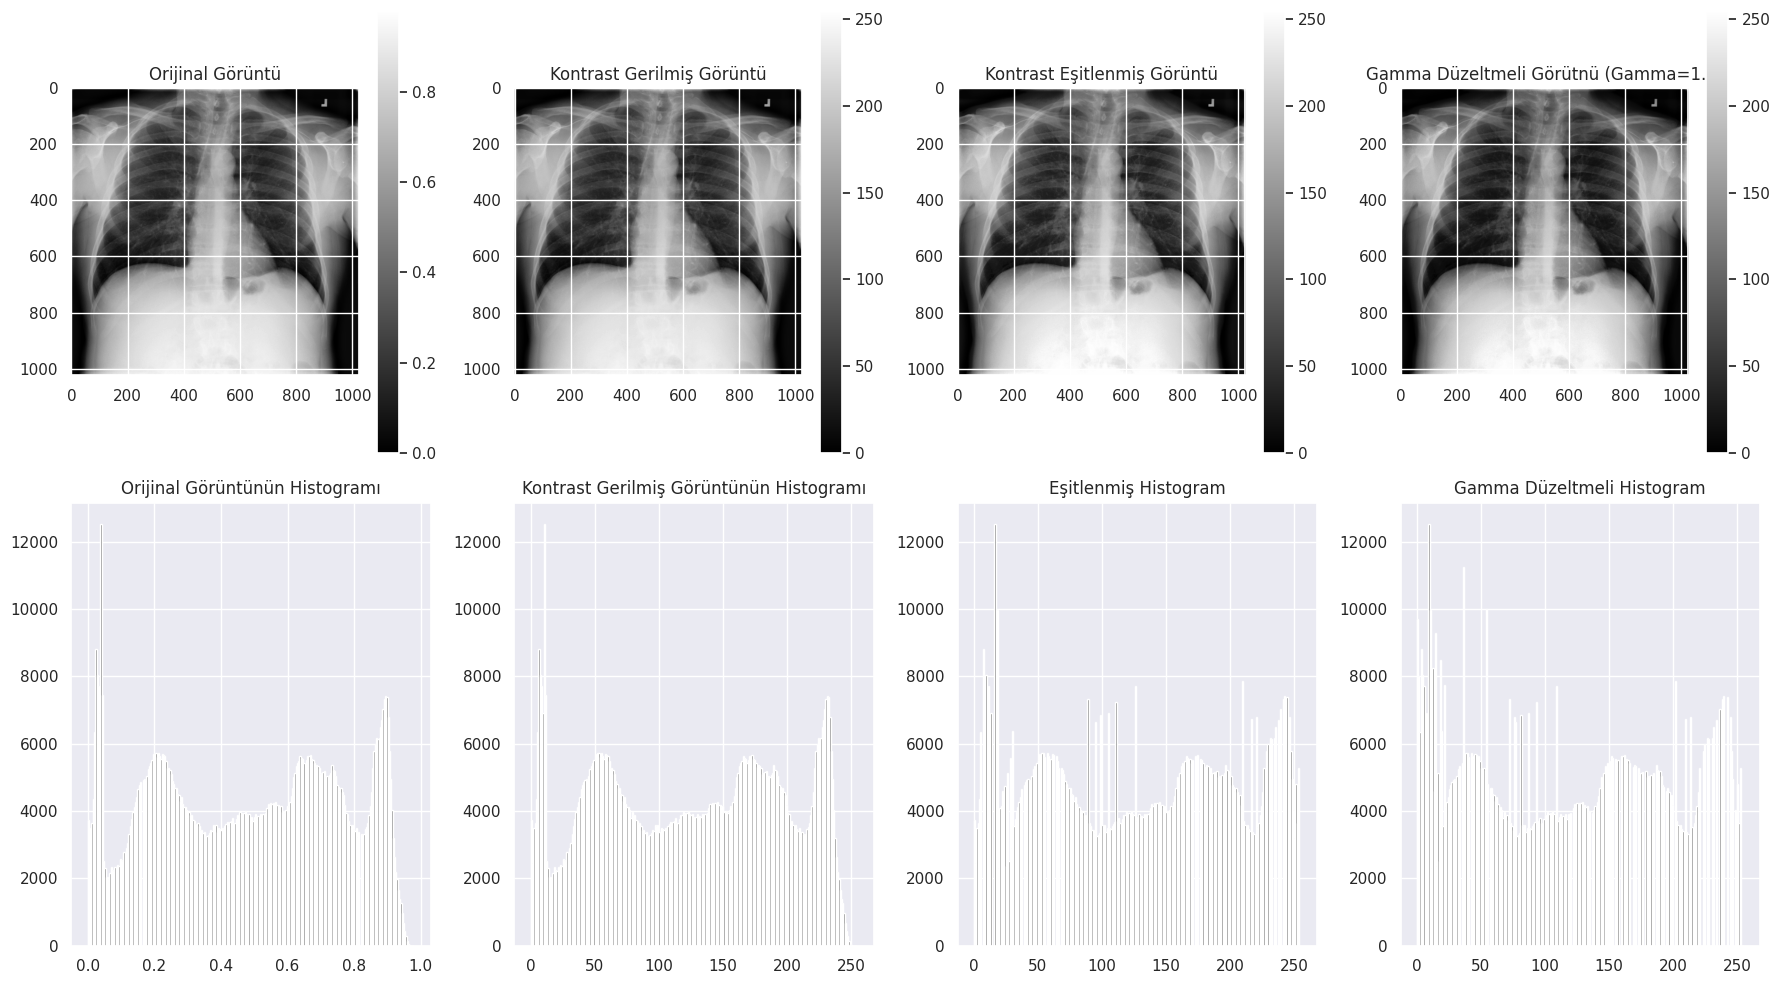

In [ ]:
# Kontrast Germe (Stretching) : Minimum ve maksimum piksel değerlerini kullanarak kontrast germe işlemi yapalım

from skimage import exposure

# Kontrast germe için min ve max değerleri hesaplayalım
min_val, max_val = raw_image.min(), raw_image.max()

# Kontsrast germe uygulayalım
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = (raw_image - min_val) / (max_val - min_val)  #  [0, 1] normalizasyonu
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  #  [0, 255] ölçeği iiçn görselleştir

# Kontrast germe işleminden sonra histogram eşitleme uyguluyoruz ve Skimage kullanarak histogram eşitleme uyguluyoruz
equalized_image = exposure.equalize_hist(contrast_stretched)     #  [0, 1] normalizasyonu
equalized_image = (equalized_image * 255).astype(np.uint8)       #  [0, 255] ölçeği iiçn görselleştir

# Eşitlenmiş görüntüye gama düzeltmesi uyguluyoruz
gamma = 1.2
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

#orijinal görüntülerin vgrafiği ve histogramı
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1)
plt.imshow(raw_image, cmap='gray')
plt.title('Orijinal Görüntü')
plt.colorbar()
plt.subplot(2, 4, 5)
plt.hist(raw_image.ravel(), bins=256, color='gray')
plt.title("Orijinal Görüntünün Histogramı")

# Kontrastla gerilmiş görüntüyü ve histogramı çiziyoruz
plt.subplot(2, 4, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Kontrast Gerilmiş Görüntü')
plt.colorbar()
plt.subplot(2, 4, 6)
plt.hist(contrast_stretched.ravel(), bins=256, color='gray')
plt.title("Kontrast Gerilmiş Görüntünün Histogramı")

# Kontrast eşitlenmiş görüntü ve histogram çiziyoruz
plt.subplot(2, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Kontrast Eşitlenmiş Görüntü')
plt.colorbar()
plt.subplot(2, 4, 7)
plt.hist(equalized_image.ravel(), bins=256, color='gray')
plt.title("Eşitlenmiş Histogram")

#Gamma Düzeltmli görüntü ve histogram çizimi
plt.subplot(2, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Düzeltmeli Görütnü (Gamma={gamma})')
plt.colorbar()
plt.subplot(2, 4, 8)
plt.hist(gamma_corrected.ravel(), bins=256, color='gray')
plt.title("Gamma Düzeltmeli Histogram")

plt.tight_layout()
plt.show()

1. Orijinal Görüntü ve Histogramı
Üstteki Görsel: İlk sütunda, görüntü üzerinde herhangi bir işlem yapılmamış ham hali gösteriliyor.
Alttaki Histogram: Orijinal görüntünün piksel yoğunluklarının dağılımını gösteriyor. Piksel yoğunlukları 0 ile 1 arasında değer alıyor. Görüntüde genellikle düşük ve orta yoğunluk değerleri baskın görünüyor.
- Yorum: Orijinal görüntüde kontrast düşük olabilir. Detayların daha net bir şekilde görülebilmesi için kontrast artırma işlemleri gerekli.

2. Kontrast Gerilmiş Görüntü ve Histogramı
Amaç: Görüntünün parlaklık değerlerini geniş bir aralığa yayarak kontrastını artırmak.
Sonuç: Görüntüdeki karanlık ve aydınlık bölgeler daha belirgin hale gelir.
Üstteki Görsel: İkinci sütunda, kontrast germe (contrast stretching) uygulanmış görüntü yer alıyor. Bu işlem, piksel değerlerini geniş bir aralığa yayarak (0-255 arasında) kontrastı artırır.
Alttaki Histogram: Piksel değerleri daha geniş bir alana yayılmıştır. Bu, kontrastın artırıldığını ve düşük yoğunluklu piksellerin daha görünür hale geldiğini gösteriyor.
- Yorum: Kontrast artırma sayesinde görüntüdeki detaylar daha belirgin hale gelmiş. Ancak, histogramda hala bazı piksel yoğunluklarının yoğun kümeler oluşturduğu görülüyor.

3. Kontrast Eşitlenmiş Görüntü ve Histogramı
Amaç: Görüntünün parlaklık seviyelerini daha dengeli dağıtarak kontrastı iyileştirmek.
Sonuç: Görüntüdeki detaylar, özellikle düşük kontrastlı bölgeler daha net görünür hale gelir.
Üstteki Görsel: Üçüncü sütunda, histogram eşitleme işlemi uygulanmış görüntü yer alıyor. Bu işlem, piksel yoğunluklarını eşit bir şekilde dağıtarak kontrastı optimize eder.
Alttaki Histogram: Piksel yoğunlukları, daha düzgün ve dengeli bir şekilde dağılmıştır. Her yoğunluk seviyesi daha eşit bir temsile sahiptir.
- Yorum: Histogram eşitleme, özellikle düşük kontrastlı görüntülerde faydalıdır. Görüntüdeki karanlık ve parlak alanlar arasındaki fark artırılmıştır, bu da daha iyi detay görselliği sağlar.

4. Gamma Düzeltilmiş Görüntü ve Histogramı
Amaç: Görüntünün parlaklık seviyelerini kontrol etmek için gama eğrisi uygulamak.
Gama < 1: Görüntü parlaklaştırılır.
Gama > 1: Görüntü karartılır.
Sonuç: Görüntü, istenen parlaklık seviyelerine uygun şekilde ayarlanır.
Üstteki Görsel: Son sütunda, gamma düzeltme (gamma correction) uygulanmış görüntü yer alıyor. Gamma değeri 1.2 olarak seçilmiştir. Bu işlem, parlak alanları daha da vurgular ve koyu alanları daha görünür hale getirebilir.
Alttaki Histogram: Piksel yoğunlukları, gamma düzeltmesine bağlı olarak yeniden dağıtılmıştır. Orta-üst seviyedeki yoğunluklar artırılmıştır.
- Yorum: Gamma düzeltme, özellikle belirli bir yoğunluk aralığını daha belirgin hale getirmek için kullanılır. Görüntü, klinik yorumlama açısından daha uygun hale gelmiştir.

## Gamma Değerini Değiştirip Farklara Bakalım

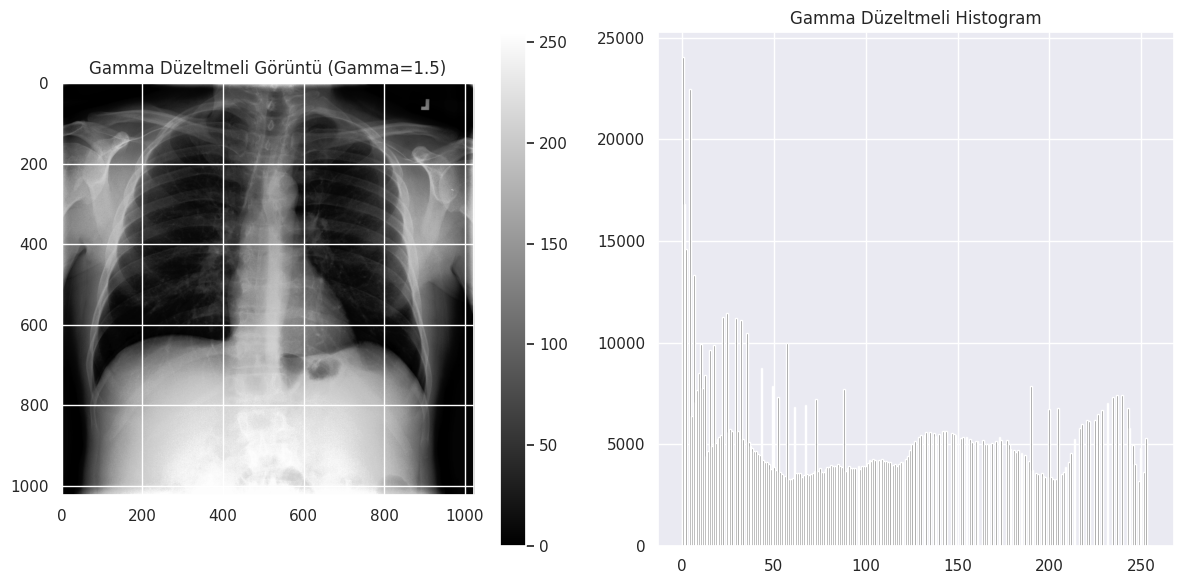

In [ ]:
# Eşitlenmiş görüntüye gamma düzeltmesi uyguluyoruz
gamma = 1.5
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Gamma düzeltmeli görüntü ve histogram çizimi
plt.figure(figsize=(12, 6))  # Görsel boyutunu artırdık (genişlik x yükseklik)
plt.subplot(1, 2, 1)  # Daha düzenli yerleşim için satır ve sütun ayarları
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Düzeltmeli Görüntü (Gamma={gamma})')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(gamma_corrected.ravel(), bins=256, color='gray')
plt.title("Gamma Düzeltmeli Histogram")

plt.tight_layout()
plt.show()


Gamma = 1.2: Daha doğal bir görünüm sağlar, detaylar korunur ve aşırı parlaklık oluşmaz.
Gamma = 1.5: Daha parlak ve kontrastlı bir görüntü oluşturur, ancak detaylar aşırı vurgulanabilir.

Sonuç: Doğal görünüm için gamma = 1.2 daha iyi, kontrast artırımı gerekiyorsa gamma = 1.5 tercih edilebilir.

<ipython-input-31-b96b4dbca53e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gamma_corrected.ravel(),


Text(0, 0.5, '# Pixels in Image')

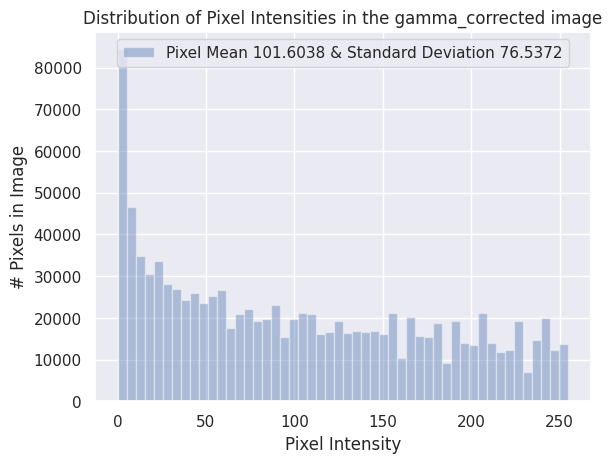

In [ ]:
# Piksel dağılımının histogramını çizelim
sns.distplot(gamma_corrected.ravel(),
             label=f'Pixel Mean {np.mean(gamma_corrected):.4f} & Standard Deviation {np.std(gamma_corrected):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the gamma_corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Yorum:
- Ortalama Piksel Yoğunluğu (Pixel Mean = 101.6038): Görüntünün genel parlaklık seviyesi düşük-orta seviyede. Bu, görüntünün genelde karanlık bölgeler içerdiğini veya gama düzeltmesinin parlaklığı aşırı artırmadığını gösterir.
- Standart Sapma (Standard Deviation = 76.5372): Piksel yoğunlukları geniş bir aralıkta dağılmış. Bu, gama düzeltmesinin görüntünün kontrastını artırmış olabileceğini gösteriyor.
-Histogramda Pik Yoğunluk (0’a Yakın Yüksek Piksel Sayısı): Görüntüde birçok karanlık (düşük yoğunluklu) piksel var. Bu, muhtemelen görüntünün kenarlarında veya gölgeli bölgelerde yoğunlaşmıştır.
- Diğer Piksel Yoğunluklarının Dağılımı: Yoğunluklar genel olarak dengeli bir dağılım gösteriyor, bu da gama düzeltmesinin kontrastı dengelediğini işaret ediyor.
-- Sonuç: Histogram, gama düzeltmesinin parlaklık ve kontrastı düzenleyerek görsel kalitesini artırdığını, ancak koyu bölgelerin hala baskın olduğunu gösteriyor. Bu durum, gama değerine veya görüntünün orijinal dinamik aralığına bağlı olabilir. Daha dengeli bir parlaklık isteniyorsa, gama değeri üzerinde ince ayar

## Tüm görüntülere Emdian ve Gaussian Bluru uygulayalım

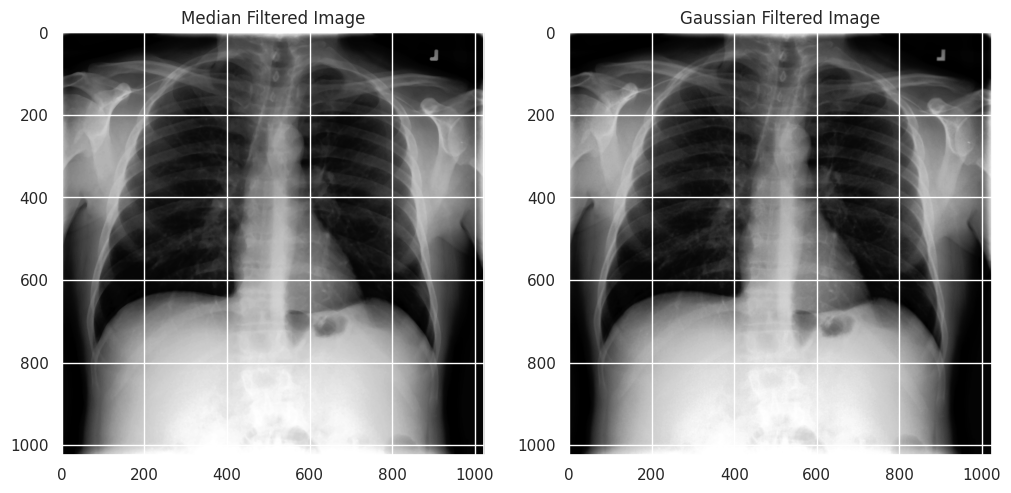

In [ ]:
import cv2  # opencv for python package

# Apply Median Filtering
median_filtered = cv2.medianBlur(gamma_corrected, 5)

# Apply Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtered Image")
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtered Image")
plt.show()


## Görüntüye, derecesi rastgele 0 ile 10 arasıda olacak şekilde rotation uygulayalım

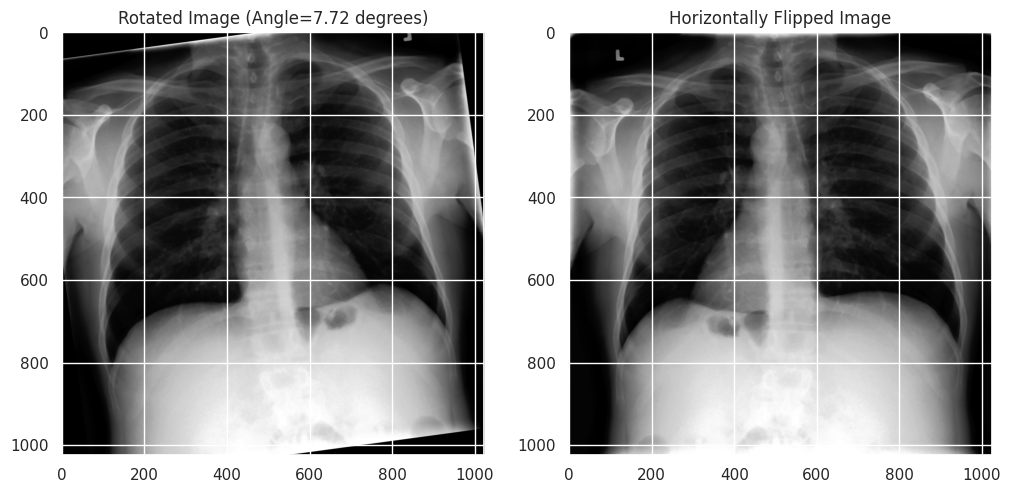

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

# 0 ile 10 arasında rastgele bir açı seçiyoruz
random_angle = random.uniform(0, 10)

# Görüntünün merkezini hesaplama
center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)

# Rastgele açıyla dönüşüm matrisi oluşturma
rotation_matrix = cv2.getRotationMatrix2D(center, angle=random_angle, scale=1.0)

# Görüntüyü döndürme işlemi
rotated_image = cv2.warpAffine(median_filtered, rotation_matrix, (median_filtered.shape[1], median_filtered.shape[0]))

# Horizontal flip işlemi
flipped_horizontal = cv2.flip(median_filtered, 1)

# Görüntülerin her ikisinin de başlıklarını döndürme açısı ile ekleyerek gösterme
plt.figure(figsize=(12, 6))

# İlk görüntü (Rotated Image) için başlıkta açıyı ekleyelim
plt.subplot(1, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title(f"Rotated Image (Angle={random_angle:.2f} degrees)")

# İkinci görüntü (Horizontally Flipped Image) için başlık ekleyelim
plt.subplot(1, 2, 2)
plt.imshow(flipped_horizontal, cmap='gray')
plt.title("Horizontally Flipped Image")

plt.show()


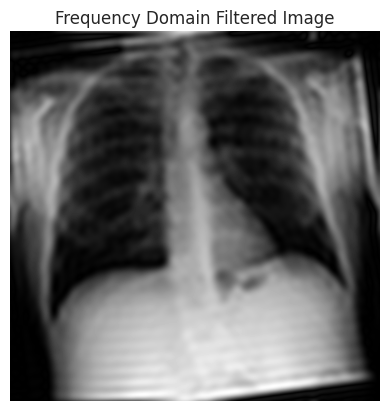

In [ ]:
# Fourier Dönüşümü uygulayın ve düşük frekansları ortalamak için kaydıralım
dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Filtreleme için bir maske oluşturalım
rows, cols = rotated_image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Maske ve ters DFT uygulayın
fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Filtrelenmiş görüntüyü normalleştirelim ve görüntüleyelim
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Domain Filtered Image")
plt.axis("off")
plt.show()


## Unsharp masking tekniği kullanarak görüntüyü keskinleştirelim

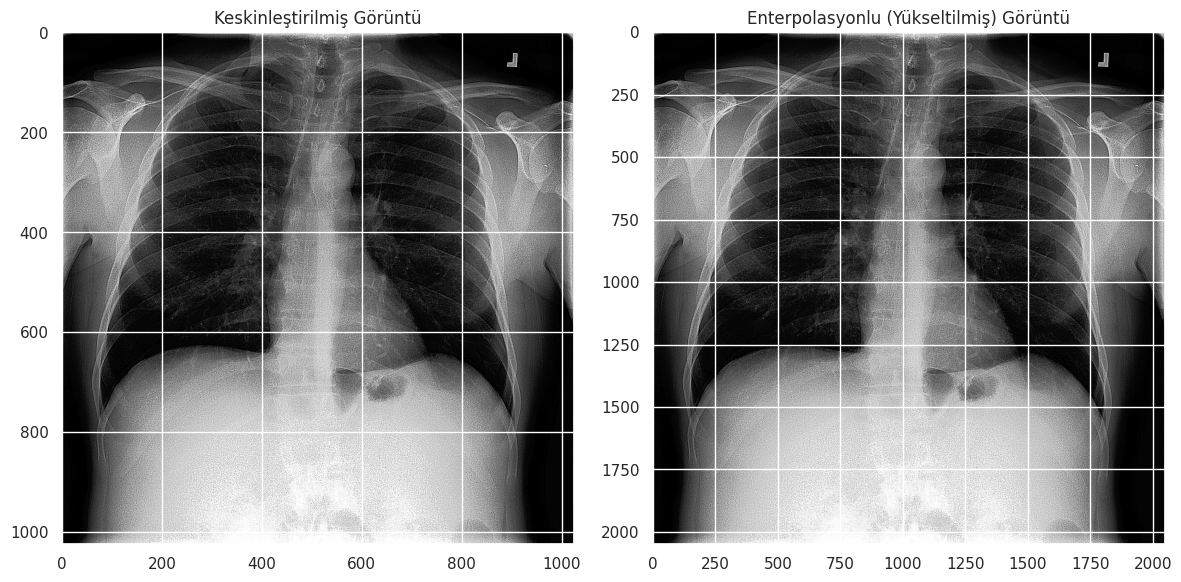

In [ ]:
from scipy.ndimage import zoom

sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened_image = np.clip(cv2.filter2D(gamma_corrected, -1, sharpening_kernel), 0, 255).astype(np.uint8)

# görüntüyü 2 katını çıkartıp enterpolasyon yapalım
scale_factor = 2
resized_image = zoom(sharpened_image, scale_factor, order=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'),plt.title("Keskinleştirilmiş Görüntü")
plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'),plt.title("Enterpolasyonlu (Yükseltilmiş) Görüntü")

plt.tight_layout()
plt.show()

Matrisin merkezdeki 9 değeri, görüntüdeki her pikselin kendisine olan katkıyı artırır.
Etrafındaki -1 değerleri ise piksellerin çevresindeki bilgiyi azaltır, böylece keskinleştirme etkisi yaratılır. En keskin değer 9 da elde edildiği için merkeze 9 değerini aldık. Farklı bir değer alsaydık nasıl olurdu aşağıda deneyelim.

### Farklı keskinleştirme filtresi ile deneyelim.

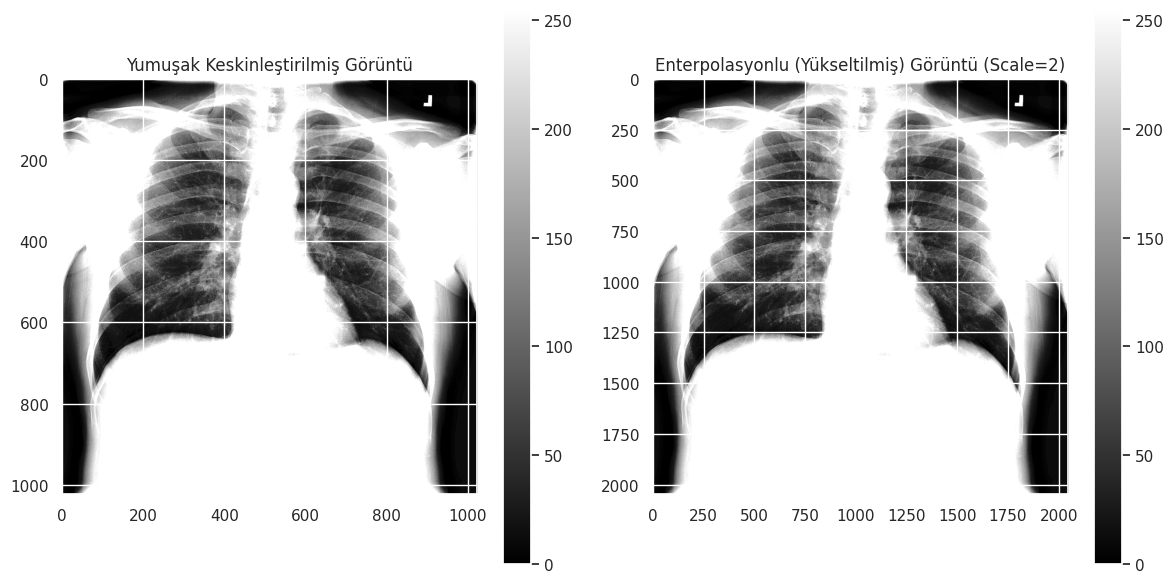

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

# Bu örnekte 'gamma_corrected' görüntüsünün bir örneğini kullandık.
# Gerçek görüntünüzü yükleyebilirsiniz. Örneğin: gamma_corrected = plt.imread('path_to_image')

# Daha yumuşak keskinleştirme filtresi
sharpening_kernel = np.array([[-0.5, -0.5, -0.5],
                              [-0.5,  7, -0.5],
                              [-0.5, -0.5, -0.5]])

# Keskinleştirme işlemi
sharpened_image = cv2.filter2D(gamma_corrected, -1, sharpening_kernel)

# Normalize etme, değerleri 0 ile 255 arasında sınırlandırma
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Yükseltme faktörü (zoom)
scale_factor = 2  # Bu değeri değiştirerek farklı sonuçlar alabilirsiniz

# Görüntüyü yeniden boyutlandırma (zoom ile)
resized_image = zoom(sharpened_image, (scale_factor, scale_factor), order=3)

# Normalize edilerek yeniden boyutlandırılmış görüntü
resized_image = np.clip(resized_image, 0, 255).astype(np.uint8)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))

# Keskinleştirilmiş görüntü
plt.subplot(1, 2, 1)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Yumuşak Keskinleştirilmiş Görüntü")
plt.colorbar()

# Yükseltilmiş (enterpolasyonlu) görüntü
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title(f"Enterpolasyonlu (Yükseltilmiş) Görüntü (Scale={scale_factor})")
plt.colorbar()

plt.tight_layout()
plt.show()


Bu filtre ile yapılan keskinleştirme, görüntüdeki detayları belirginleştirdi.  Özellikle kenarlar ve ince ayrıntılar daha net hale gelmiştir. Ancak, kullanılan 7'lik merkez değeri çevresindeki -0.5'lik değerlerle birleştiğinde, keskinleşme fazla güçlü olmuş ve bazı yapay etkilere yol açmış olabilir. Bu durum, görüntünün daha fazla kontrasta sahip olmasına neden olmuş, ancak doğal olmayan bir etki yaratmış oldu. Yani, keskinlik artmış ancak görüntüde yapaylık belirginleşmiş.